In [1]:
#This one is the clean version LSTM for Text Fake New Detection

#!pip install tensorflow

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd 
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

2023-09-03 02:00:37.026483: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-03 02:00:37.027481: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-03 02:00:37.051242: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-03 02:00:37.051815: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 02:00:37.523137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

True

In [2]:
df = pd.read_csv(r"/home/phyu/Eimon/Pioneer/Data/archive_3/WELFake_Dataset.csv")
df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
np.shape(df)



(72134, 4)

In [4]:
x = list(range(10000,72133))

In [5]:
df1 = df.drop(df.index[x])
np.shape(df1)

(10001, 4)

In [6]:
x2 = list(range(0,64133))

In [7]:
df2 = df.drop(df.index[x2])
np.shape(df2)

(8001, 4)

In [8]:
x3 = list(range(0,42133)) + list(range(50133,72133))

In [9]:
df3 = df.drop(df.index[x3])
np.shape(df3)

(8001, 4)

In [10]:
df1.dropna(inplace=True)
df1.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [11]:
df2.dropna(inplace=True)
df2.head()

,Unnamed: 0,title,text,label
64133,64133,"Over 20 Injured, Almost 40 Detained in Venezue...","— Alfredo Romero (@alfredoromero) October 26, ...",1
64134,64134,From Monster to Mr. President-Elect: Democrats...,From Monster to Mr. President-Elect: Democrat...,1
64135,64135,Boy wearing a ‘My dad is an ATM’ T-shirt chase...,Boy wearing a ‘My dad is an ATM’ T-shirt chase...,1
64136,64136,How to Survive Being an Airbnb Host - The New ...,After my first Airbnb guests checked out of ou...,0
64137,64137,Fighting in Ukraine May Complicate U.S. Thaw W...,MOSCOW — The war in eastern Ukraine that si...,0


In [12]:
df3.dropna(inplace=True)
df3.head()

,Unnamed: 0,title,text,label
42133,42133,Want a Zika Test? It’s Not Easy - The New York...,MIAMI — After returning from a honeymoon in...,0
42134,42134,Rising Tumult Over Principal at Elite Queens H...,"There has been a and a rally, an allegation ...",0
42135,42135,APER Releasing the Arrivals,Support Us APER Releasing the Arrivals \nMail ...,1
42136,42136,Hacker Guccifer 2.0 Says Election Could Be Rig...,Pin \n( ZHE ) Before the recent torrent of dai...,1
42137,42137,Senate intelligence panel to probe Russia hacking,WASHINGTON (Reuters) - The leaders of the Sena...,0


In [13]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [14]:
np.shape(df)

(72134, 4)

In [15]:
df1.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [16]:
np.shape(df1)

(9928, 4)

[Text(0.5, 0, 'Fake = 1, Real News = 0'),
 Text(0, 0.5, 'Number of Fake/True'),
 Text(0.5, 1.0, 'Count of Fake and True News Dataset #1')]

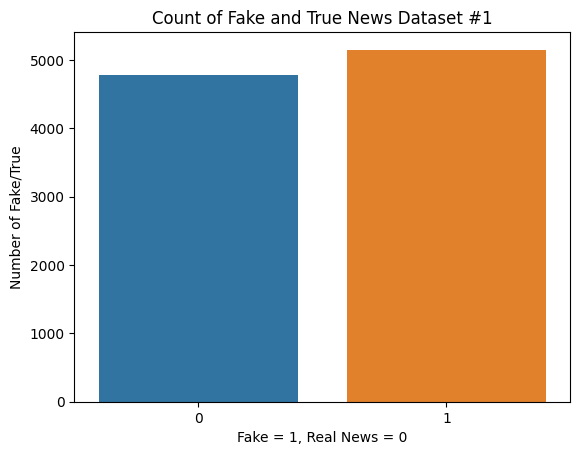

In [17]:
import seaborn as sns
df1_plt = sns.countplot(x = df1["label"])
df1_plt.set(xlabel='Fake = 1, Real News = 0', ylabel='Number of Fake/True',title='Count of Fake and True News Dataset #1')


[Text(0.5, 0, 'Fake = 1, Real News = 0'),
 Text(0, 0.5, 'Number of Fake/True'),
 Text(0.5, 1.0, 'Count of Fake and True News Dataset #2')]

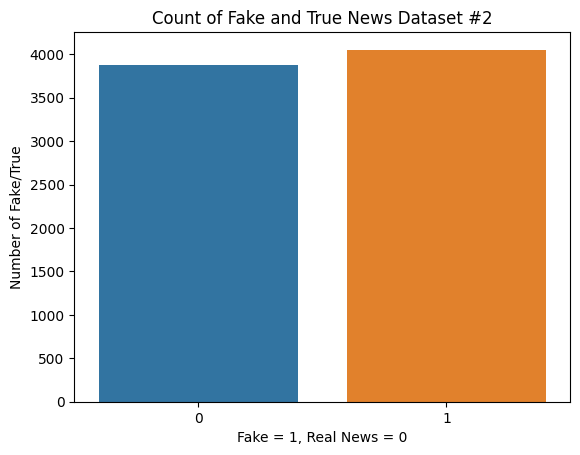

In [18]:
df2_plt = sns.countplot(x = df2["label"])
df2_plt.set(xlabel='Fake = 1, Real News = 0', ylabel='Number of Fake/True',title='Count of Fake and True News Dataset #2')


[Text(0.5, 0, 'Fake = 1, Real News = 0'),
 Text(0, 0.5, 'Number of Fake/True'),
 Text(0.5, 1.0, 'Count of Fake and True News Dataset #3')]

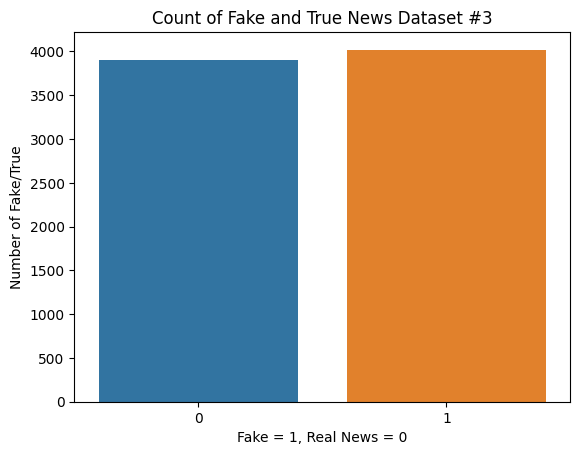

In [19]:
df3_plt = sns.countplot(x = df3["label"])
df3_plt.set(xlabel='Fake = 1, Real News = 0', ylabel='Number of Fake/True',title='Count of Fake and True News Dataset #3')


In [20]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

#nltk.download('punkt')
#nltk.download('stopwords')

def preprocess_text(text):
     
    # remove all tokens that are not alphabetic
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    stripped_words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in stripped_words if not w in stop_words]

    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return stemmed_tokens

In [21]:
df1['preprocessed_tokens'] = df1['text'].apply(preprocess_text)

print(df1[['label', 'preprocessed_tokens']].head())

   label                                preprocessed_tokens
0      1  [comment, expect, barack, obama, member, fukyo...
2      1  [demonstr, gather, last, night, exercis, const...
3      0  [dozen, polit, activ, pastor, came, privat, di...
4      1  [sarmat, missil, dub, satan, replac, fli, mile...
5      1  [say, one, time, someon, su, southern, poverti...


In [22]:
df2['preprocessed_tokens'] = df2['text'].apply(preprocess_text)

print(df2[['label', 'preprocessed_tokens']].head())

       label                                preprocessed_tokens
64133      1  [alfredo, romero, alfredoromero, octob, romero...
64134      1  [monster, mr, presidentelect, democrat, grovel...
64135      1  [boy, wear, dad, atm, tshirt, chase, mob, fath...
64136      0  [first, airbnb, guest, check, garag, apart, la...
64137      0  [moscow, war, eastern, ukrain, simmer, quietli...


In [23]:
df3['preprocessed_tokens'] = df3['text'].apply(preprocess_text)

print(df3[['label', 'preprocessed_tokens']].head())

       label                                preprocessed_tokens
42133      0  [miami, return, honeymoon, dominican, republ, ...
42134      0  [ralli, alleg, fake, news, petit, garner, thou...
42135      1  [support, us, aper, releas, arriv, mail, publi...
42136      1  [pin, zhe, recent, torrent, daili, podesta, em...
42137      0  [washington, reuter, leader, senat, intellig, ...


In [24]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import seaborn as sns

sentences = df1['preprocessed_tokens'].tolist()
labels = df1['label'].tolist()

In [25]:
sentences_2 = df2['preprocessed_tokens'].tolist()
labels_2 = df2['label'].tolist()

In [26]:
sentences_3 = df3['preprocessed_tokens'].tolist()
labels_3 = df3['label'].tolist()

In [27]:
print(np.shape(sentences))

(9928,)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [28]:
df1.head()

,Unnamed: 0,title,text,label,preprocessed_tokens
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,"[comment, expect, barack, obama, member, fukyo..."
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,"[demonstr, gather, last, night, exercis, const..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"[dozen, polit, activ, pastor, came, privat, di..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"[sarmat, missil, dub, satan, replac, fli, mile..."
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,"[say, one, time, someon, su, southern, poverti..."


In [29]:
y = labels
y_2 = labels_2
y_3 = labels_3

In [30]:
X = sentences
X_2 =sentences_2
X_3 = sentences_3

In [31]:
vec_size = 100
w2v_model = Word2Vec(sentences = X, vector_size=vec_size, window=5, min_count=1, workers=4)


In [32]:
len(w2v_model.wv)

88930

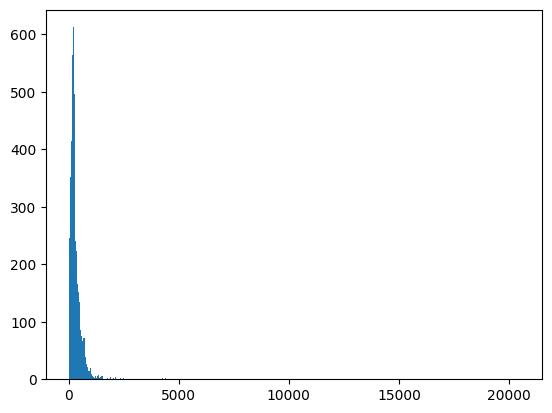

In [33]:
import matplotlib.pyplot as plt
plt.hist([len(x) for x in X], bins = 1000)
plt.show()

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [35]:
tokenizer_2 = Tokenizer()
tokenizer_2.fit_on_texts(X_2)
X_2 = tokenizer_2.texts_to_sequences(X_2)

In [36]:
tokenizer_3 = Tokenizer()
tokenizer_3.fit_on_texts(X_3)
X_3 = tokenizer_2.texts_to_sequences(X_3)

In [37]:
import seaborn as sns
maxlen = 1200
X = pad_sequences(X, maxlen = maxlen)
X_2 = pad_sequences(X_2, maxlen = maxlen)
X_3 = pad_sequences(X_3, maxlen = maxlen)

In [38]:
nos = np.array([len(x) for x in X])
len(nos[nos>maxlen])

0

In [39]:
from tensorflow.keras.layers import Input, LSTM, Embedding, RepeatVector

word_embeddings = {word: w2v_model.wv[word] for word in tokenizer.word_index.keys() if word in w2v_model.wv}
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, embedding in word_embeddings.items():
    embedding_matrix[tokenizer.word_index[word]] = embedding


In [40]:
embedding_matrix.shape

(88931, 100)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D

vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

EMB = Embedding(vocab_size,output_dim = vec_size,weights=[embedding_matrix],input_length = maxlen, trainable = False)


In [42]:
model = Sequential()
model.add(EMB)
model.add(LSTM(units=128))# Adjust input_shape based on your data
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y))

In [44]:
history_LSTM = model.fit(X_train, y_train, epochs=5, validation_split = 0.3).history #This is LSTM model

Epoch 1/5
163/163 [==============================] - 114s 698ms/step - loss: 0.3785 - accuracy: 0.8310 - val_loss: 0.2935 - val_accuracy: 0.8948
Epoch 2/5
163/163 [==============================] - 100s 614ms/step - loss: 0.3721 - accuracy: 0.8206 - val_loss: 0.3111 - val_accuracy: 0.8706
Epoch 3/5
163/163 [==============================] - 94s 580ms/step - loss: 0.3072 - accuracy: 0.8682 - val_loss: 0.2405 - val_accuracy: 0.9029
Epoch 4/5
163/163 [==============================] - 96s 588ms/step - loss: 0.2564 - accuracy: 0.8927 - val_loss: 0.2095 - val_accuracy: 0.9105
Epoch 5/5
163/163 [==============================] - 94s 579ms/step - loss: 0.1782 - accuracy: 0.9313 - val_loss: 0.1652 - val_accuracy: 0.9333


In [45]:
y_pred_LSTM = (model.predict(X_test) >= 0.5).astype(int)


78/78 [==============================] - 16s 204ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


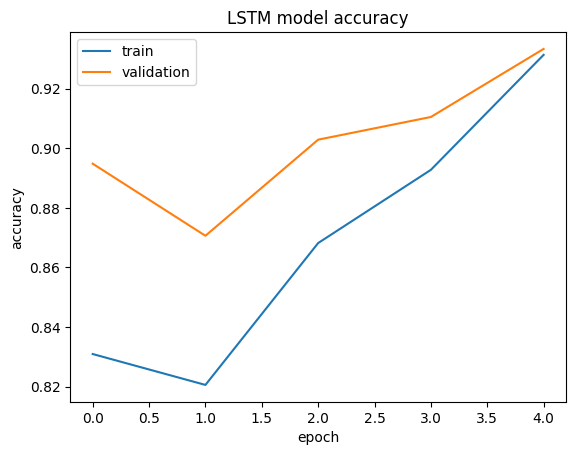

In [46]:
print(history_LSTM.keys())
#  "Accuracy"
plt.plot(history_LSTM['accuracy'])
plt.plot(history_LSTM['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



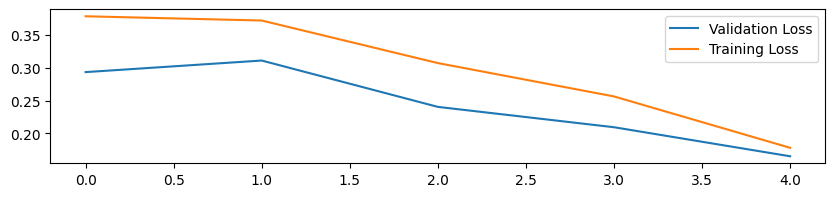

In [47]:
history_LSTM
plt.figure(figsize=(10, 2))

plt.plot(history_LSTM["val_loss"], label="Validation Loss")
plt.plot(history_LSTM["loss"], label="Training Loss")
plt.legend()


In [48]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

## print classification report
print(classification_report(y_test,y_pred_LSTM))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1174
           1       0.92      0.94      0.93      1308

    accuracy                           0.93      2482
   macro avg       0.93      0.93      0.93      2482
weighted avg       0.93      0.93      0.93      2482



In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Org_accuracy = accuracy_score(y_pred_LSTM, y_test)
print(f"Original Approach Accuracy: {Org_accuracy:.4f}")


Original Approach Accuracy: 0.9271


Text(45.722222222222214, 0.5, 'Real Labels')

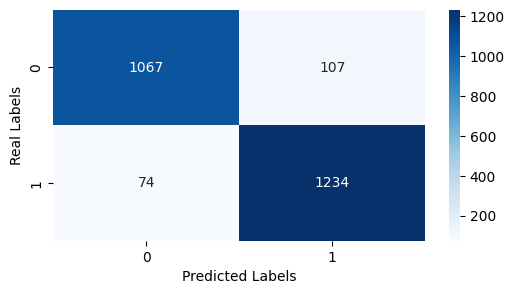

In [50]:
#plot the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score

plt.figure(figsize = (6,3))

sns.heatmap(confusion_matrix(y_test,y_pred_LSTM), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [51]:
y_pred_LSTM_2 = (model.predict(X_2) >= 0.5).astype(int)

248/248 [==============================] - 53s 212ms/step


In [52]:
Org_accuracy_2 = accuracy_score(y_pred_LSTM_2, y_2)
print(f"Original Approach Accuracy 2: {Org_accuracy_2:.4f}")

Original Approach Accuracy 2: 0.8266


Text(45.722222222222214, 0.5, 'Real Labels')

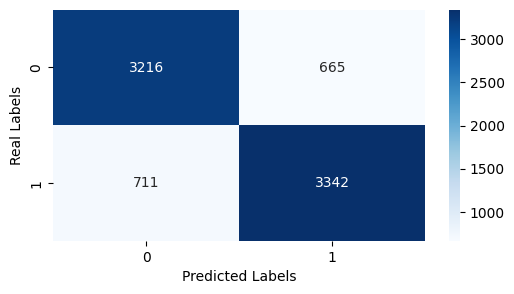

In [53]:
plt.figure(figsize = (6,3))

sns.heatmap(confusion_matrix(y_2,y_pred_LSTM_2), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [54]:
## print classification report
print(classification_report(y_2,y_pred_LSTM_2))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3881
           1       0.83      0.82      0.83      4053

    accuracy                           0.83      7934
   macro avg       0.83      0.83      0.83      7934
weighted avg       0.83      0.83      0.83      7934



In [55]:
y_pred_LSTM_3 = (model.predict(X_3) >= 0.5).astype(int)

248/248 [==============================] - 42s 171ms/step


In [56]:
Org_accuracy_3 = accuracy_score(y_pred_LSTM_3, y_3)
print(f"Original Approach Accuracy 3: {Org_accuracy_3:.4f}")

Original Approach Accuracy 3: 0.8085


Text(45.722222222222214, 0.5, 'Real Labels')

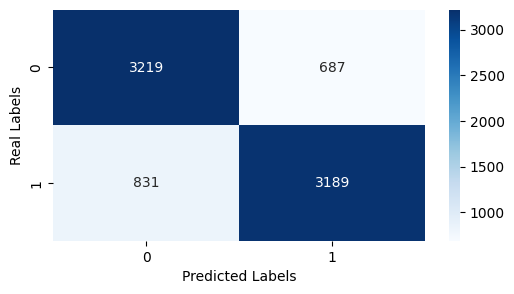

In [57]:
plt.figure(figsize = (6,3))

sns.heatmap(confusion_matrix(y_3,y_pred_LSTM_3), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [58]:
X_train_N = np.float32(X_train)
X_test_N = np.float32(X_test)

In [59]:
X_train_N_mean = X_train_N.mean()
X_train_N = X_train_N - X_train_N_mean
X_train_N_std = X_train_N.std()
X_train_N /= X_train_N_std


X_test_N_mean = X_test_N.mean()
X_test_N = X_test_N - X_test_N_mean
X_test_N_std = X_test_N.std()
X_test_N /= X_test_N_std



In [60]:
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(maxlen,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(maxlen, activation='sigmoid')
])

In [61]:
# normalize training and testing set using mean and std deviation of training set

X_2_N = np.float32(X_2)
X_3_N = np.float32(X_3)

In [62]:
X_2_N_mean = X_2_N.mean()
X_3_N_mean = X_3_N.mean()


In [63]:
X_2_N = X_2_N - np.float32(X_2_N_mean)
X_2_N_std = X_2_N.std()
X_2_N /= X_2_N_std
print(X_2_N_std)

4186.51


In [64]:
X_3_N = X_3_N - np.float32(X_3_N_mean)
X_3_N_std = X_3_N.std()
X_3_N /= X_3_N_std
print(X_3_N_std)

3066.9062


In [65]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
history_auto = autoencoder.fit(X_train_N, X_train_N, epochs=7,validation_data=(X_test_N, X_test_N), shuffle=True).history

Epoch 1/7
233/233 [==============================] - 1s 5ms/step - loss: 0.9478 - accuracy: 0.0553 - val_loss: 0.9098 - val_accuracy: 0.1297
Epoch 2/7
233/233 [==============================] - 1s 3ms/step - loss: 0.9008 - accuracy: 0.2165 - val_loss: 0.8943 - val_accuracy: 0.2583
Epoch 3/7
233/233 [==============================] - 1s 3ms/step - loss: 0.8875 - accuracy: 0.3133 - val_loss: 0.8881 - val_accuracy: 0.3082
Epoch 4/7
233/233 [==============================] - 1s 3ms/step - loss: 0.8799 - accuracy: 0.3425 - val_loss: 0.8846 - val_accuracy: 0.3485
Epoch 5/7
233/233 [==============================] - 1s 3ms/step - loss: 0.8746 - accuracy: 0.3629 - val_loss: 0.8833 - val_accuracy: 0.3578
Epoch 6/7
233/233 [==============================] - 1s 3ms/step - loss: 0.8706 - accuracy: 0.3805 - val_loss: 0.8827 - val_accuracy: 0.3771
Epoch 7/7
233/233 [==============================] - 1s 3ms/step - loss: 0.8673 - accuracy: 0.3899 - val_loss: 0.8800 - val_accuracy: 0.3771


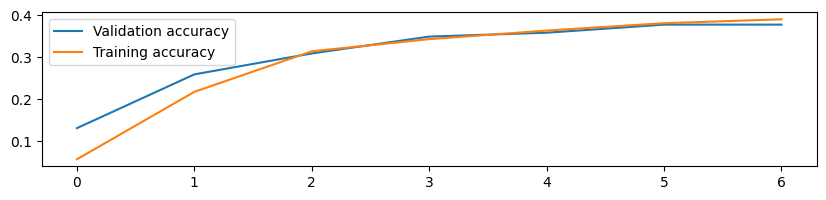

In [66]:
plt.figure(figsize=(10, 2))
plt.plot(history_auto["val_accuracy"], label="Validation accuracy")
plt.plot(history_auto["accuracy"], label="Training accuracy")
plt.legend()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


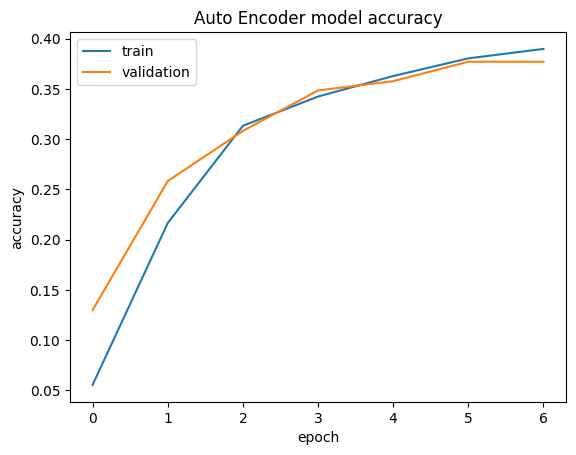

In [67]:
print(history_auto.keys())
#  "Accuracy"
plt.plot(history_auto['accuracy'])
plt.plot(history_auto['val_accuracy'])
plt.title('Auto Encoder model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [68]:
reconstructed_news_1 = autoencoder.predict(X_test_N)
reconstruction_errors_1 = np.mean((X_test_N - reconstructed_news_1) ** 2, axis=1)
threshold_1 = np.percentile(reconstruction_errors_1, 99)
anomaly_indices_1 = np.where(reconstruction_errors_1 > threshold_1)[0]

78/78 [==============================] - 0s 1ms/step


In [69]:
reconstructed_news_2 = autoencoder.predict(X_2_N)
reconstruction_errors_2 = np.mean((X_2_N - reconstructed_news_2) ** 2, axis=1)
threshold_2 = np.percentile(reconstruction_errors_2, 99)
anomaly_indices_2 = np.where(reconstruction_errors_2 > threshold_2)[0]

248/248 [==============================] - 0s 1ms/step


In [70]:
reconstructed_news_3 = autoencoder.predict(X_3_N)
reconstruction_errors_3 = np.mean((X_3_N - reconstructed_news_3) ** 2, axis=1)
threshold_3 = np.percentile(reconstruction_errors_3,99)
anomaly_indices_3 = np.where(reconstruction_errors_3 > threshold_3)[0]


248/248 [==============================] - 0s 1ms/step


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


def predict(model_test, data, threshold):
    reconstructions = model_test(data)
    loss = tf.keras.losses.mse(reconstructions, data)
    return tf.math.greater(loss, threshold)


preds_auto_1 = predict(autoencoder, X_test_N, threshold_1)
print("AutoEncoder Accuracy Dataset #1 = {}".format(accuracy_score(preds_auto_1,y_test)))

preds_auto_2 = predict(autoencoder, X_2_N, threshold_2)
print("AutoEncoder Accuracy Dataset #2 = {}".format(accuracy_score(preds_auto_2,y_2)))

preds_auto_3 = predict(autoencoder, X_3_N, threshold_3)
print("AutoEncoder Accuracy Dataset #3 = {}".format(accuracy_score(preds_auto_3,y_3)))


AutoEncoder Accuracy Dataset #1 = 0.4814665592264303
AutoEncoder Accuracy Dataset #2 = 0.49798336274262667
AutoEncoder Accuracy Dataset #3 = 0.4948271511481201


In [73]:
from sklearn.metrics import accuracy_score

anomaly_predictions_1 = np.zeros_like(y_pred_LSTM) # return zro sanme shape as y_pred_LSTM
aTemp = anomaly_indices_1
anomaly_predictions_1[aTemp] = 1 
combined_predictions_1 = y_pred_LSTM | anomaly_predictions_1


combined_accuracy = accuracy_score(combined_predictions_1, y_test)
print(f"Combined Approach Accuracy: {combined_accuracy:.4f}")

Combined Approach Accuracy: 0.9271


In [74]:
anomaly_predictions_2 = np.zeros_like(y_pred_LSTM_2) 
aTemp_2 = anomaly_indices_2
anomaly_predictions_2[aTemp_2] = 1
combined_predictions_2 = y_pred_LSTM_2 | anomaly_predictions_2


# Calculate combined accuracy
combined_accuracy_2 = accuracy_score(combined_predictions_2, y_2)
print(f"Combined Approach Accuracy: {combined_accuracy_2:.4f}")

Combined Approach Accuracy: 0.8271


In [75]:
anomaly_predictions_3 = np.zeros_like(y_pred_LSTM_3)
aTemp_3 = anomaly_indices_3
anomaly_predictions_3[aTemp_3] = 1
combined_predictions_3= y_pred_LSTM_3 | anomaly_predictions_3


# Calculate combined accuracy
combined_accuracy_3 = accuracy_score(combined_predictions_3, y_3)
print(f"Combined Approach Accuracy: {combined_accuracy_3:.4f}")

Combined Approach Accuracy: 0.8063


In [76]:
#Classification report for Combined -Dataset #3
print(classification_report(y_3,combined_predictions_3))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3906
           1       0.82      0.80      0.81      4020

    accuracy                           0.81      7926
   macro avg       0.81      0.81      0.81      7926
weighted avg       0.81      0.81      0.81      7926



In [77]:
#Classification report for LSTM - Dataset #3
print(classification_report(y_3,y_pred_LSTM_3))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      3906
           1       0.82      0.79      0.81      4020

    accuracy                           0.81      7926
   macro avg       0.81      0.81      0.81      7926
weighted avg       0.81      0.81      0.81      7926



In [78]:
#Classification report for AutoEncoder - Threshold Datast #3
print(classification_report(y_3,preds_auto_3))

              precision    recall  f1-score   support

           0       0.49      0.99      0.66      3906
           1       0.60      0.01      0.02      4020

    accuracy                           0.49      7926
   macro avg       0.55      0.50      0.34      7926
weighted avg       0.55      0.49      0.34      7926



In [79]:
#Classification report for AutoEncoder - Anomaly Dataset #3
print(classification_report(y_3,anomaly_predictions_3))

              precision    recall  f1-score   support

           0       0.49      0.99      0.66      3906
           1       0.60      0.01      0.02      4020

    accuracy                           0.49      7926
   macro avg       0.55      0.50      0.34      7926
weighted avg       0.55      0.49      0.34      7926



In [80]:
#Classification report for Combined - Dataset #2
print(classification_report(y_2,combined_predictions_2))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3881
           1       0.83      0.83      0.83      4053

    accuracy                           0.83      7934
   macro avg       0.83      0.83      0.83      7934
weighted avg       0.83      0.83      0.83      7934



In [81]:
#Classification report for AutoEncoder - LSTM Dataset #2
print(classification_report(y_2,y_pred_LSTM_2))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3881
           1       0.83      0.82      0.83      4053

    accuracy                           0.83      7934
   macro avg       0.83      0.83      0.83      7934
weighted avg       0.83      0.83      0.83      7934



In [82]:
#Classification report for AutoEncoder - Threshold Dataset #2
print(classification_report(y_2,preds_auto_2))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      3881
           1       0.94      0.02      0.04      4053

    accuracy                           0.50      7934
   macro avg       0.72      0.51      0.35      7934
weighted avg       0.72      0.50      0.34      7934



In [83]:
#Classification report for AutoEncoder - Anomaly Dataset #2
print(classification_report(y_2,anomaly_predictions_2))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      3881
           1       0.94      0.02      0.04      4053

    accuracy                           0.50      7934
   macro avg       0.72      0.51      0.35      7934
weighted avg       0.72      0.50      0.34      7934



In [84]:
#Classification report for Combined -Dataset # 1
print(classification_report(y_test,combined_predictions_1))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1174
           1       0.92      0.94      0.93      1308

    accuracy                           0.93      2482
   macro avg       0.93      0.93      0.93      2482
weighted avg       0.93      0.93      0.93      2482



In [85]:
#Classification report for LSTM - Dataset #2
print(classification_report(y_2,y_pred_LSTM_2))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3881
           1       0.83      0.82      0.83      4053

    accuracy                           0.83      7934
   macro avg       0.83      0.83      0.83      7934
weighted avg       0.83      0.83      0.83      7934



In [86]:
#Classification report for AutoEncoder - Threshold Dataset #1
print(classification_report(y_test,preds_auto_1))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1174
           1       0.92      0.02      0.03      1308

    accuracy                           0.48      2482
   macro avg       0.70      0.51      0.34      2482
weighted avg       0.71      0.48      0.32      2482



In [87]:
#Classification report for AutoEncoder - Anomaly Approach Dataset #1
print(classification_report(y_test,anomaly_predictions_1))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1174
           1       0.92      0.02      0.03      1308

    accuracy                           0.48      2482
   macro avg       0.70      0.51      0.34      2482
weighted avg       0.71      0.48      0.32      2482



In [88]:
Anomaly_accuracy_1 = accuracy_score(anomaly_predictions_1, y_test)
print(f"AutoEncoderAnomaly Approach Accuracy for Data set # 1: {Anomaly_accuracy_1:.4f}")
Anomaly_accuracy_2 = accuracy_score(anomaly_predictions_2, y_2)
print(f"AurtoEncoder Anomaly Approach Accuracy for Data set # 2: {Anomaly_accuracy_2:.4f}")
Anomaly_accuracy_3 = accuracy_score(anomaly_predictions_3, y_3)
print(f"AutoEncoder Anomaly Approach Accuracy for Data set # 3: {Anomaly_accuracy_3:.4f}")

AutoEncoderAnomaly Approach Accuracy for Data set # 1: 0.4815
AurtoEncoder Anomaly Approach Accuracy for Data set # 2: 0.4980
AutoEncoder Anomaly Approach Accuracy for Data set # 3: 0.4948


Text(45.722222222222214, 0.5, 'Real Labels')

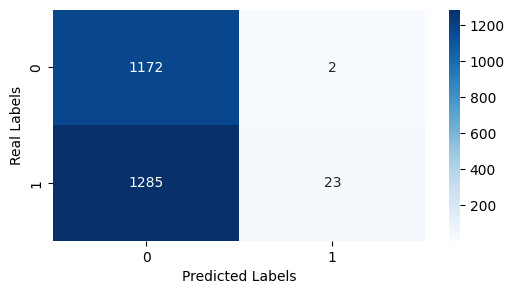

In [89]:
plt.figure(figsize = (6,3))

sns.heatmap(confusion_matrix(y_test,preds_auto_1), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

Text(45.722222222222214, 0.5, 'Real Labels')

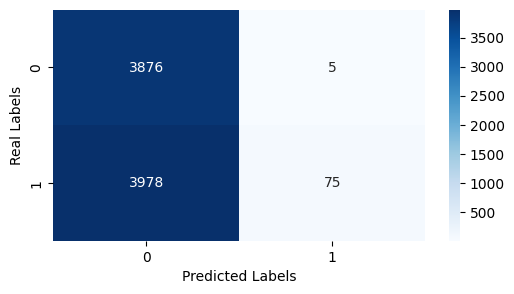

In [90]:
plt.figure(figsize = (6,3))

sns.heatmap(confusion_matrix(y_2,preds_auto_2), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

Text(45.722222222222214, 0.5, 'Real Labels')

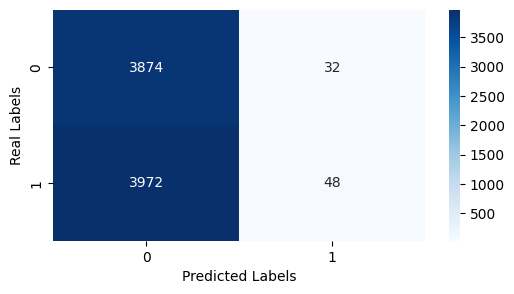

In [91]:
plt.figure(figsize = (6,3))

sns.heatmap(confusion_matrix(y_3,preds_auto_3), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

Text(45.722222222222214, 0.5, 'Real Labels')

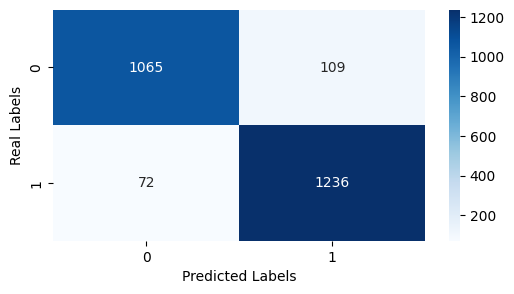

In [92]:
plt.figure(figsize = (6,3))

sns.heatmap(confusion_matrix(y_test,combined_predictions_1), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

Text(45.722222222222214, 0.5, 'Real Labels')

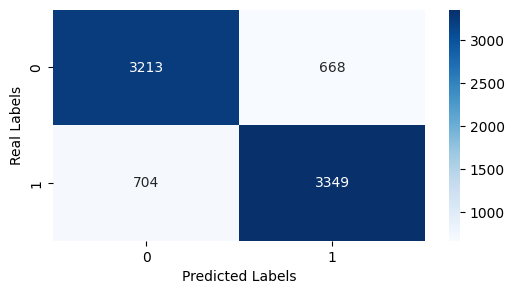

In [93]:
plt.figure(figsize = (6,3))

sns.heatmap(confusion_matrix(y_2,combined_predictions_2), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

Text(45.722222222222214, 0.5, 'Real Labels')

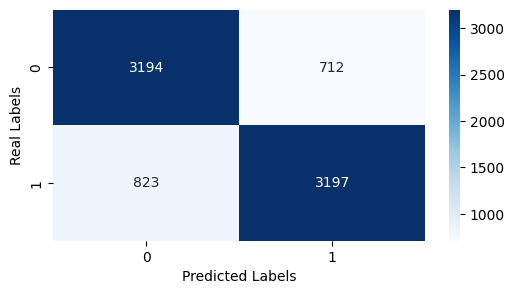

In [94]:
plt.figure(figsize = (6,3))

sns.heatmap(confusion_matrix(y_3,combined_predictions_3), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')